In [1]:
#Get most frequent Words from Negative and Positive Tweets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
import contractions
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as im
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

file_name = '2900_per_day'
#Import CSV and create DataFrame
df = pd.read_csv(r'C:\\Users\\Yairb\\Desktop\\PythonPP\\Datasets\\' + file_name + '.csv')
df['date'] = pd.to_datetime(df['date'])               #Change datatype to datetime
df['user_created_at'] = pd.to_datetime(df['user_created_at'])               #Change datatype to datetime
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

#Clean Dataset
def clean(text):
    text = text.lower()                                          #Lowercase Tweets
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)      #Delete URLs
    text = re.sub('@[^\s]+','',text)                             #Remove @Users
    text = text.replace(r"\n", " ")                              #Delete "\n"
    text = re.sub(r'\s+',' ', text)                              #Replace two or more spaces with only one
    #Remove special characters such as #, -, " (? and ! in)
    #Hashtags are not removed, only the hash symbol
    text = re.sub(r'[^#a-zA-z0-9\'\s]', '', text)

    return text

#print(df.head())
df['text'] = df['text'].apply(clean)
#print(df['text'].head())

#Expand contractions in column text_no_contractions (returns tokenized text)
df['text_no_contractions'] = df['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
#print(df[['text', 'text_no_contractions']].head())

#Convert tokenized column into strings
df['text_str'] = [' '.join(map(str, each)) for each in df['text_no_contractions']]
#print(df[['text', 'text_no_contractions', 'text_str']].head())

#Tokenize again
df['tokenized_text'] = df['text_str'].apply(word_tokenize)
#print(df[['text_str', 'tokenized_text']].head())

#Remove stop words
stop_words = stopwords.words('english')
df['tokenized_text_no_stopwords'] = df['tokenized_text'].apply(lambda x: 
                                                                    [word for word in x 
                                                                     if word not in stop_words])
    
h1 = df['text'].str.extractall(r'(\#\w+)')[0].value_counts()
#print(h1.head(50))


words_dict = h1.to_dict()

#print(words_dict)
top_words = h1.to_frame()
top_words = top_words.reset_index().rename(columns={'index': 'Word', 0:'Frequency'})
#print(words_dict)
#print("Word Frequency in Negative Tweets")
print(top_words.head(30))



                Word  Frequency
0           #covid19      33776
1             #trump      11800
2       #coronavirus       4002
3             #biden       1460
4              #vote       1190
5             #covid       1143
6     #trumphascovid       1121
7               #gop       1086
8        #trumpcovid        982
9            #unmaga        917
10    #humptytrumpty        914
11         #dopeydon        911
12  #bidenharris2020        880
13       #trumpvirus        843
14    #superspreader        811
15     #election2020        780
16             #maga        717
17       #votehimout        653
18     #trumpcovid19        626
19         #pandemic        621
20      #donaldtrump        613
21              #usa        583
22        #wearamask        557
23        #democrats        555
24            #pence        516
25        #covidiots        510
26         #maga2020        505
27       #whitehouse        490
28        #regeneron        489
29         #covidiot        459


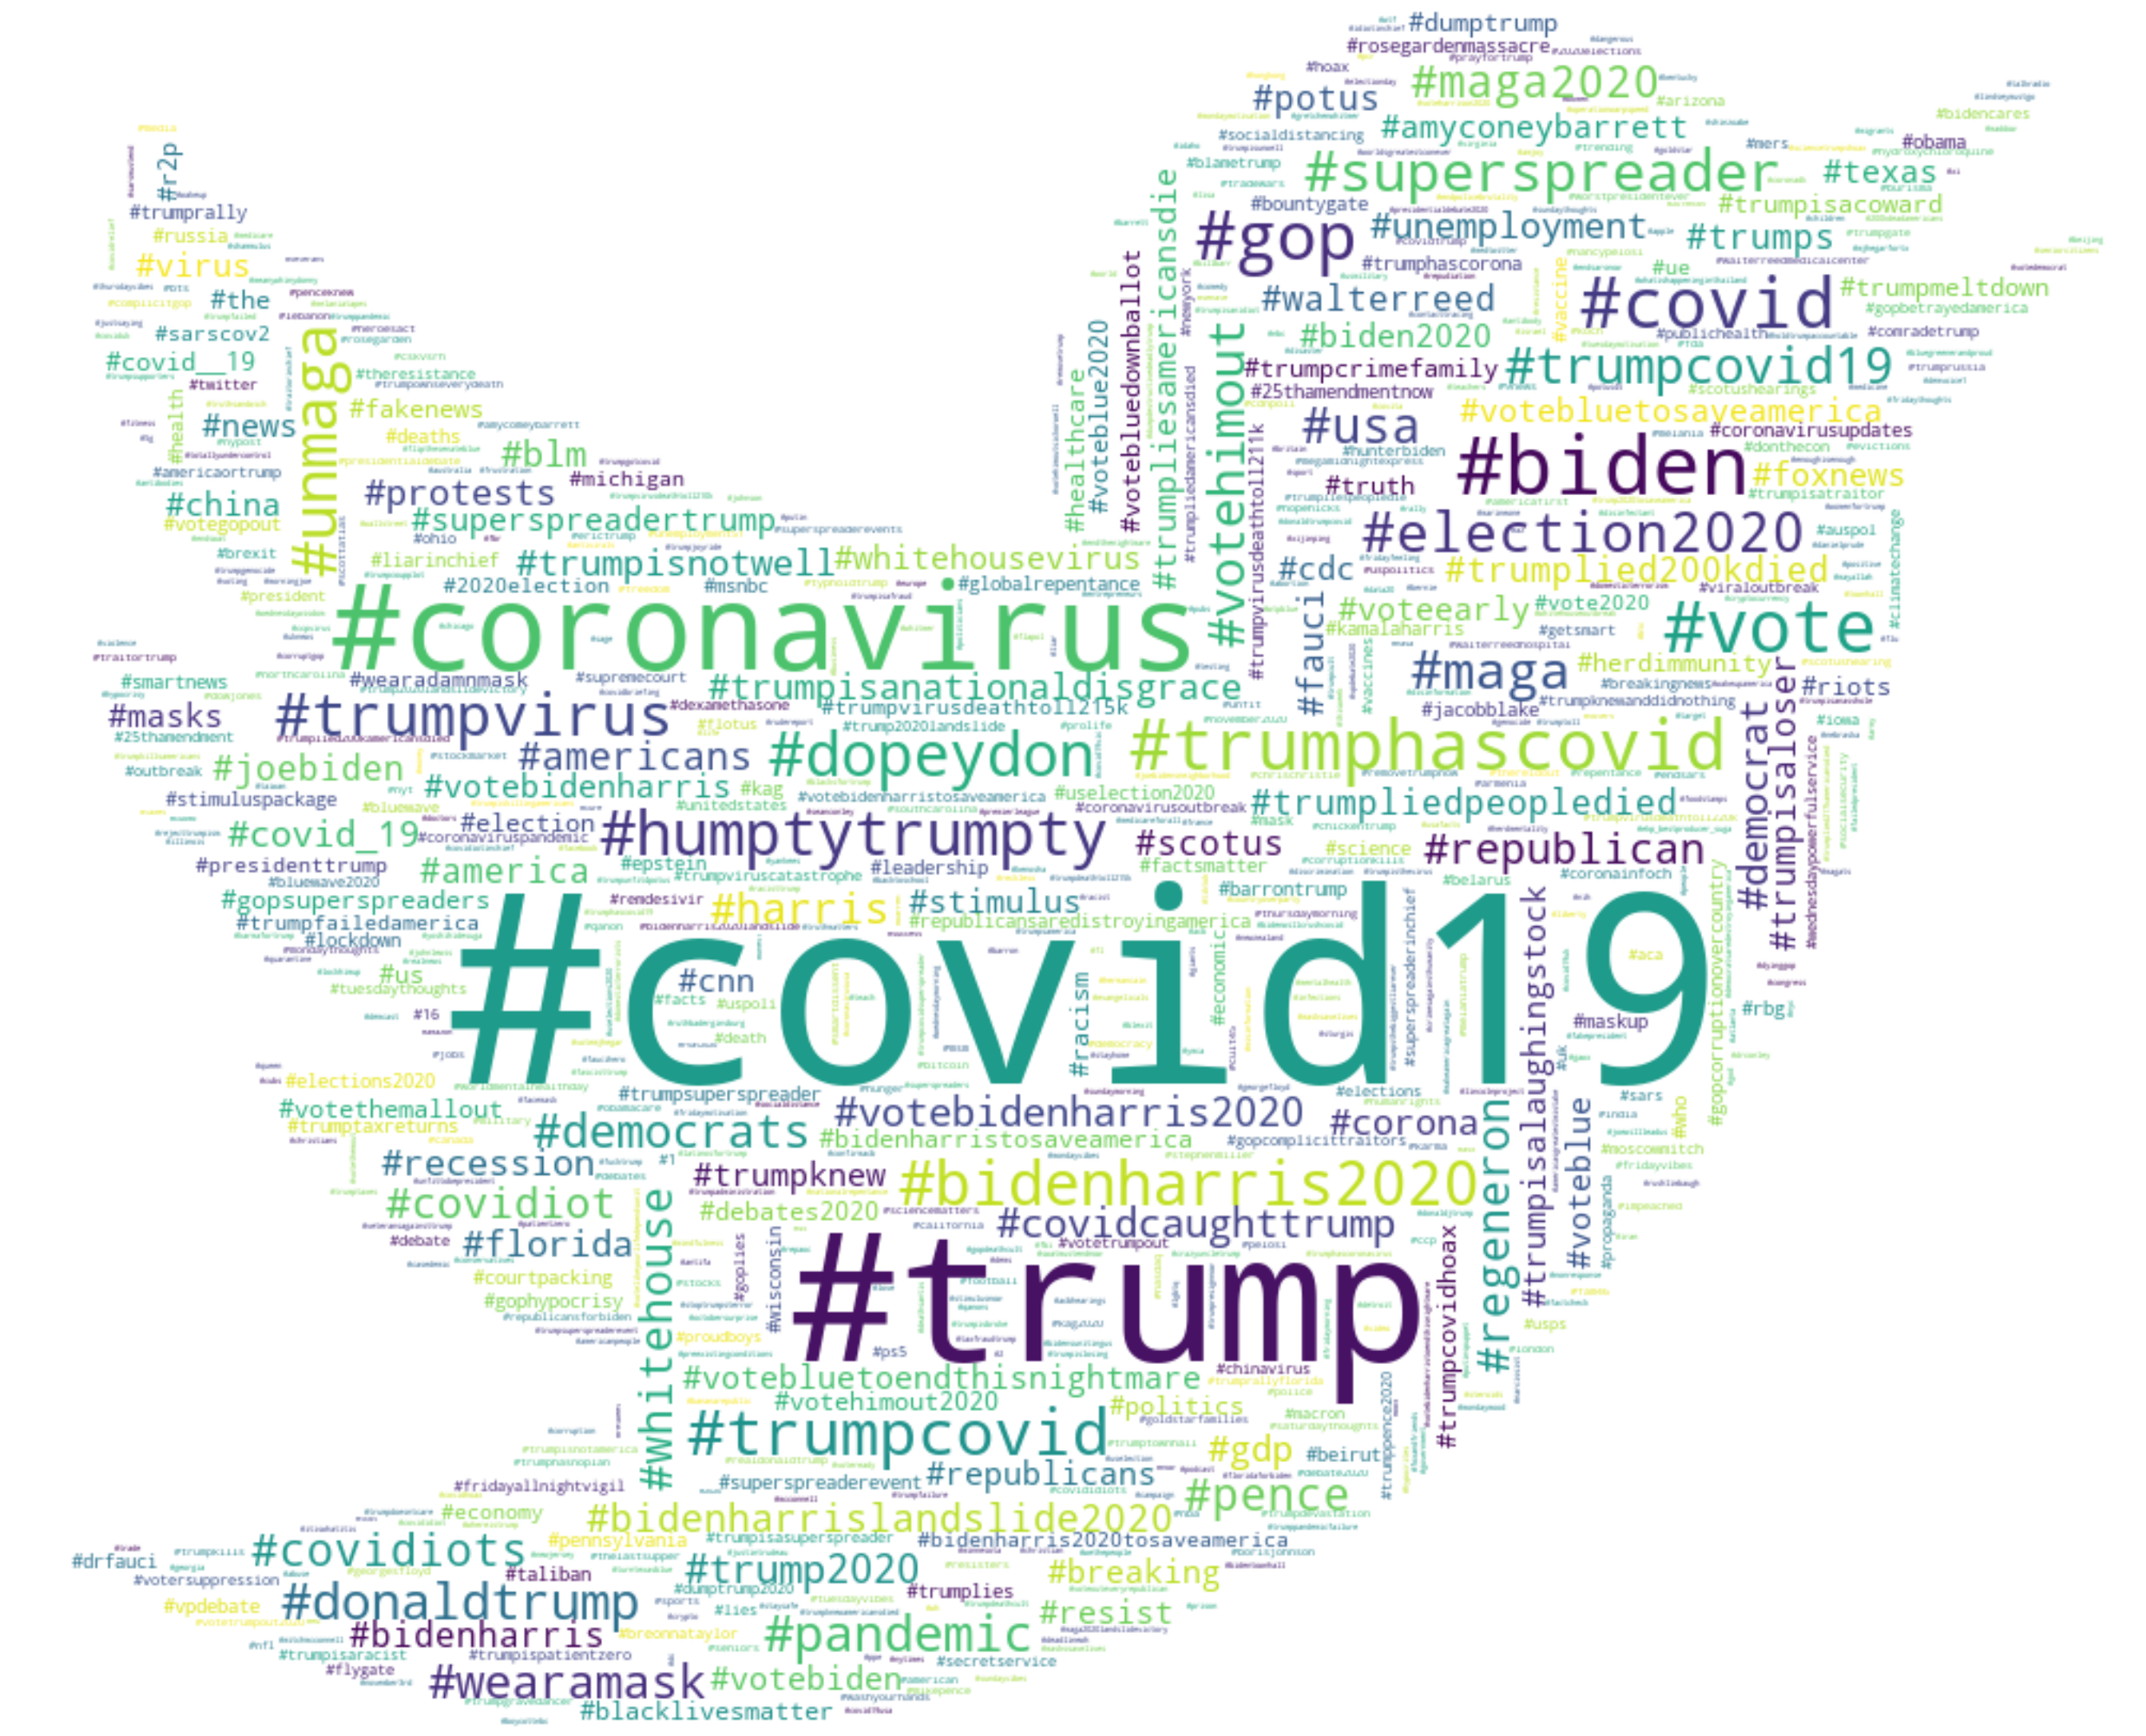

In [26]:
mask = np.array(Image.open(r'C:\Users\yairb\Desktop\PythonPP\twitter_mask.png'))


from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    mask = mask,
    background_color = 'white', 
    max_words=None).generate_from_frequencies(words_dict)
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.close()


In [4]:
top_words2 = top_words.head(30)
print(top_words2)



                Word  Frequency
0           #covid19      33776
1             #trump      11800
2       #coronavirus       4002
3             #biden       1460
4              #vote       1190
5             #covid       1143
6     #trumphascovid       1121
7               #gop       1086
8        #trumpcovid        982
9            #unmaga        917
10    #humptytrumpty        914
11         #dopeydon        911
12  #bidenharris2020        880
13       #trumpvirus        843
14    #superspreader        811
15     #election2020        780
16             #maga        717
17       #votehimout        653
18     #trumpcovid19        626
19         #pandemic        621
20      #donaldtrump        613
21              #usa        583
22        #wearamask        557
23        #democrats        555
24            #pence        516
25        #covidiots        510
26         #maga2020        505
27       #whitehouse        490
28        #regeneron        489
29         #covidiot        459


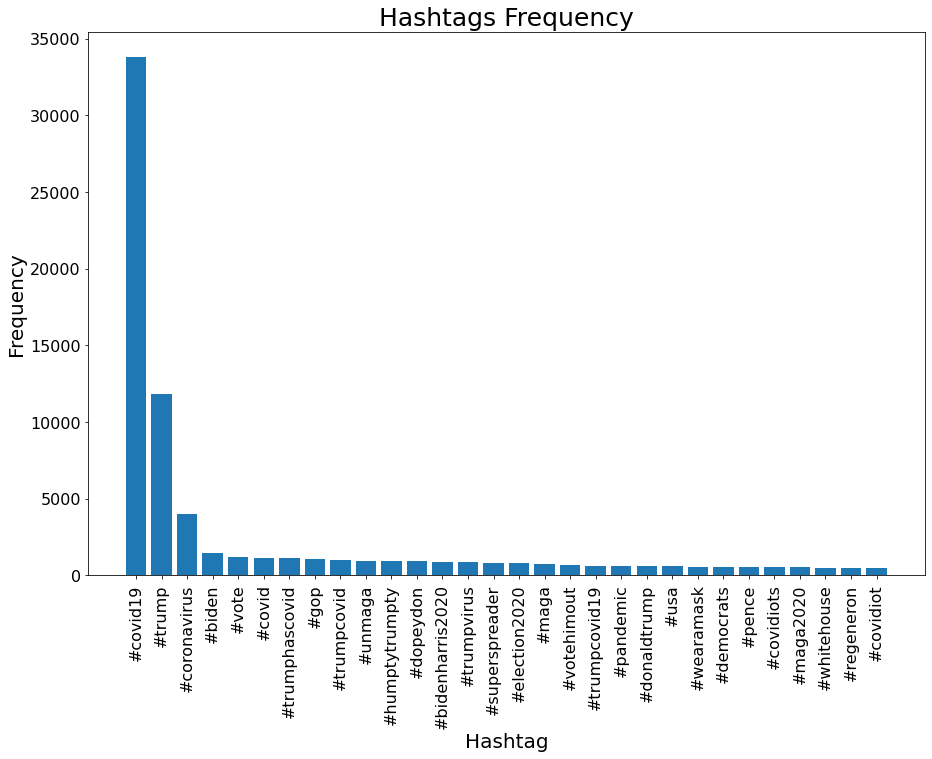

In [5]:
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
fig, ax = plt.subplots(figsize=[15,10])
plt.bar(top_words2['Word'], top_words2['Frequency'])
plt.title("Hashtags Frequency", fontsize=25)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Hashtag", fontsize=20)
plt.xticks(rotation=90)
ax.tick_params(axis='x', which='major', pad=5)
plt.show()